In [2]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [73]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/csv-10-30/ABS.csv',names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])

In [74]:
data.head()

,date,adjust,close,change_perc,avg,volume_match,value_match,volume_reconcile,value_reconcile,open,high,low,volume
0,2020-03-18,10.002,12.95,19.9074,12.95,9690.0,1.254855e+08,0.0,0.0,12.95,12.95,12.95,9690.0
1,2020-03-19,10.697,13.85,6.9498,13.85,12840.0,1.778340e+08,0.0,0.0,13.85,13.85,13.85,12840.0
2,2020-03-20,11.430,14.80,6.8592,14.80,10080.0,1.491840e+08,0.0,0.0,14.80,14.80,14.80,10080.0
3,2020-03-23,12.202,15.80,6.7568,15.80,8110.0,1.281380e+08,0.0,0.0,15.80,15.80,15.80,8110.0
4,2020-03-24,13.052,16.90,6.9620,16.90,210860.0,3.563534e+09,0.0,0.0,16.90,16.90,16.90,210860.0


In [75]:
data.drop(["change_perc", "volume_match", "avg",
           "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)

In [7]:
data.values

array([['2020-03-18', 10.002, 12.95, ..., 12.95, 12.95, 9690.0],
       ['2020-03-19', 10.697000000000001, 13.85, ..., 13.85, 13.85,
        12840.0],
       ['2020-03-20', 11.43, 14.8, ..., 14.8, 14.8, 10080.0],
       ...,
       ['2021-09-15', 20.25, 20.25, ..., 20.4, 19.9, 571600.0],
       ['2021-09-16', 19.8, 19.8, ..., 20.25, 19.7, 535300.0],
       ['2021-09-17', 20.1, 20.1, ..., 20.2, 19.8, 464600.0]],
      dtype=object)

# Chuẩn hóa


In [76]:
scaler = MinMaxScaler()
caled = scaler.fit_transform(data.values[:, 1:])

In [77]:
scaled

array([[0.01911151, 0.03899083, 0.04402985, 0.03539157, 0.04616588,
        0.002311  ],
       [0.02947227, 0.05275229, 0.05746269, 0.04894578, 0.06025039,
        0.00310141],
       [0.04039952, 0.06727829, 0.07164179, 0.06325301, 0.07511737,
        0.00240886],
       ...,
       [0.17188432, 0.15061162, 0.15522388, 0.14759036, 0.15492958,
        0.14330737],
       [0.16517591, 0.14373089, 0.15298507, 0.14533133, 0.15179969,
        0.13419885],
       [0.16964818, 0.14831804, 0.14925373, 0.14457831, 0.15336463,
        0.11645857]])

In [78]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [79]:
X_train=scaled[0:300]
y_train=scaled[0:300]
X_train=np.reshape(X_train, (300 , 1 , 6))

In [80]:
X_train.shape[1]

1

In [89]:
regressor = Sequential()
#input_shape: 30 là cửa sổ, đầu ra mỗi bước là 6 thuộc tính của X_train
regressor.add(LSTM(units=6, activation= 'sigmoid', input_shape=(30, X_train[0].shape[-1])))
# regressor.add(LSTM(units=1, activation= 'sigmoid', input_shape=(X_train.shape[1], 1)))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=7, epochs=250)

Epoch 1/250
43/43 [==============================] - 1s 1ms/step - loss: 0.0584
Epoch 2/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 3/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0521
Epoch 4/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 5/250
43/43 [==============================] - 0s 2ms/step - loss: 0.0467
Epoch 6/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0443
Epoch 7/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0420
Epoch 8/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 9/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 10/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 11/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0342
Epoch 12/250
43/43 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 13/250
43/43 [=================

In [90]:
inputs = scaled[300:]
inputs = np.reshape(inputs, (78, 1, 6))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [91]:
real_stock_price=data.values[300:, 2:3].reshape(78)
real_stock_price
predicted_stock_price=predicted_stock_price[:,1:2].reshape(78)
print(predicted_stock_price)
print(real_stock_price)

[45.65355  46.830685 47.075172 48.14181  48.290363 47.52329  45.572453
 41.434155 37.382786 35.25013  33.504925 34.003754 37.065006 34.833076
 33.322746 32.761383 32.929897 30.934395 31.17861  29.775723 30.116392
 30.61896  30.01117  29.098202 27.270487 25.292177 22.939358 20.947767
 19.425348 20.197426 22.135529 23.784899 23.443699 21.585308 20.308817
 18.429949 18.476389 18.711496 18.095974 17.19979  17.052591 17.260843
 17.526588 17.741816 18.307943 18.17544  18.486732 20.19638  20.299458
 20.292608 19.85431  19.278475 19.436546 19.434635 19.259937 19.635635
 20.065893 19.574333 19.032038 17.973255 17.173035 17.612114 17.874157
 18.51272  18.581972 17.989004 17.790237 17.916521 17.73298  17.753803
 17.4727   17.353405 17.221695 17.473888 17.72972  18.05569  17.8558
 17.982706]
[44.0 44.0 45.0 45.8 46.2 43.8 41.5 38.6 35.9 35.0 33.1 35.4 35.9 33.8
 32.9 33.2 32.55 31.9 31.4 30.6 30.6 31.1 30.3 29.7 28.3 26.5 24.65 22.95
 21.35 22.8 24.35 26.05 25.0 23.5 22.2 20.65 21.7 20.4 20.0 19.5

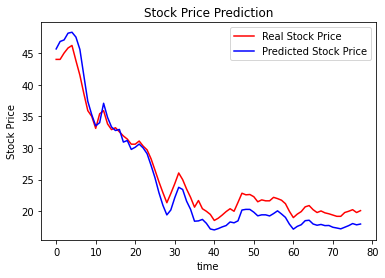

In [92]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('time' )
plt.ylabel('Stock Price' )
plt.legend()
plt.show()